In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [3]:
#loading dataset into dataframe
df = pd.read_csv('data/cleaned/train_filtered.csv')

df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,AMT_APPLICATION,AMT_CREDIT_prev,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_prev,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,CNT_PAYMENT
0,1,Cash loans,M,N,Y,0,406597.5,24700.5,351000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,Cash loans,F,N,N,0,1293502.5,35698.5,1129500.0,Family,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,135000.0,6750.0,135000.0,Unaccompanied,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,312682.5,29686.5,297000.0,Unaccompanied,...,0.0,0.0,1638.0,112320.0,-10000.0,-10000.0,-10000.0,-10000.0,-10000.0,12.0
4,0,Cash loans,M,N,Y,0,513000.0,21865.5,513000.0,Unaccompanied,...,202500.0,215865.0,1638.0,202500.0,-739.0,-746.0,-746.0,-1076.0,365243.0,12.0


In [4]:
#calculating main metrics for our filtered table
npl_rate = (len(df[df['TARGET'] == 1]) / len(df)) * 100

total_outstanding_balance_all_loans = df['AMT_CREDIT'].sum()
total_outstanding_balance_non_performing_loans = df[df['TARGET'] == 1]['AMT_CREDIT'].sum()
par = (total_outstanding_balance_non_performing_loans / total_outstanding_balance_all_loans) * 100

performing_to_non_performing = len(df[(df['TARGET'] == 0) & (df['DAYS_NP'] > 0)])
total_performing_loans = len(df[df['TARGET'] == 0])
roll_rate = (performing_to_non_performing / total_performing_loans) * 100

print(f"NPL Rate: {npl_rate:.2f}%")
print(f"PAR: {par:.2f}%")
print(f"Roll Rate: {roll_rate:.2f}%")

NPL Rate: 8.07%
PAR: 7.52%
Roll Rate: 0.08%


In [10]:
# numeric_columns = df.select_dtypes(exclude=['object'])
# categorical_columns = df.select_dtypes(include=['object'])

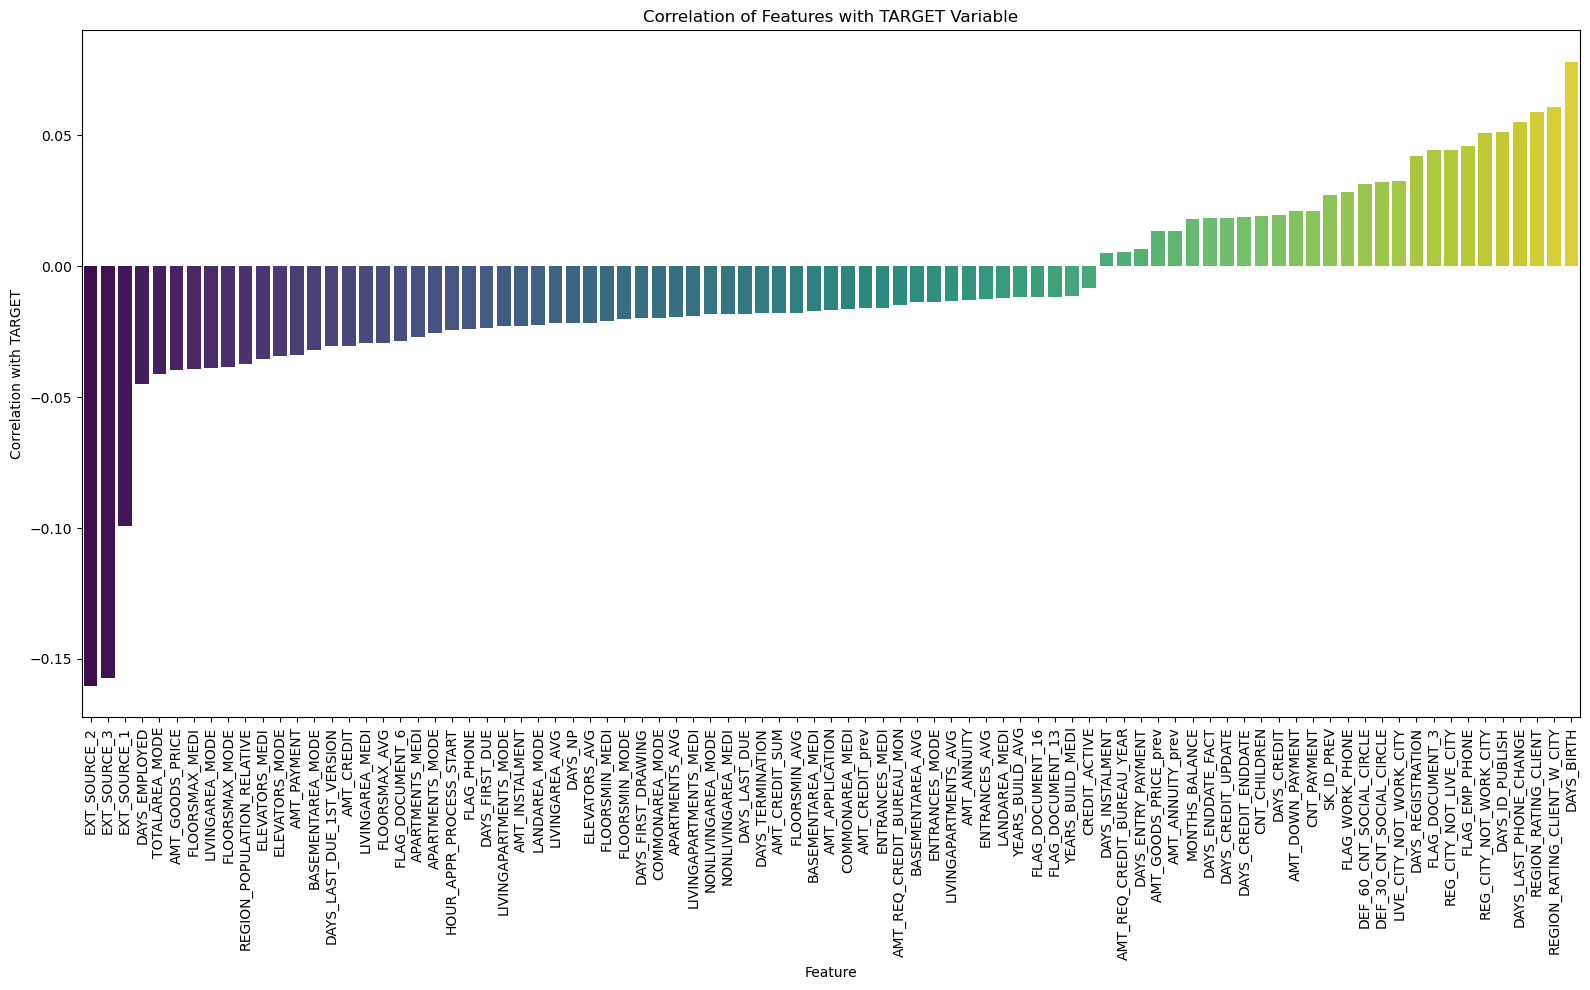

In [4]:
#correlation matrix regarting TARGET (numeric_columns)
correlation_matrix = df.corr()

correlation_with_target = correlation_matrix['TARGET']

sorted_correlation = correlation_with_target.drop('TARGET').sort_values()

plt.figure(figsize=(16, 10))
sns.barplot(x=sorted_correlation.index, y=sorted_correlation.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Correlation with TARGET')
plt.title('Correlation of Features with TARGET Variable')
plt.tight_layout()
plt.show()

In [5]:
#printing out correlation values
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['TARGET']

sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)

sorted_correlation

TARGET                         1.000000
EXT_SOURCE_2                   0.160303
EXT_SOURCE_3                   0.157397
EXT_SOURCE_1                   0.099153
DAYS_BIRTH                     0.078241
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051459
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045983
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044345
DAYS_REGISTRATION              0.041975
TOTALAREA_MODE                 0.041036
AMT_GOODS_PRICE                0.039629
FLOORSMAX_MEDI                 0.039156
LIVINGAREA_MODE                0.038797
FLOORSMAX_MODE                 0.038376
REGION_POPULATION_RELATIVE     0.037228
ELEVATORS_MEDI                 0.035551
ELEVATORS_MODE                 0.034219
AMT_PAYMENT                    0.033915
LIVE_CITY_NOT_WORK_CITY        0.032518


In [6]:
#one more layer of filteration
correlation_matrix = df.corr()

correlation_with_target = correlation_matrix['TARGET']

columns_to_drop = correlation_with_target[correlation_with_target.abs() < 0.03].index

df_filtered = df.drop(columns=columns_to_drop)

In [7]:
df.shape

(307510, 103)

In [14]:
df.dtypes

TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_PHONE                       int64
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START  

In [9]:
#encoding categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

df_encoded = pd.get_dummies(df, columns=categorical_columns)

df_encoded.head()

,TARGET,AMT_CREDIT,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,REGION_RATING_CLIENT,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,1,406597.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,2,...,0,0,0,0,0,0,1,0,1,0
1,0,1293502.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,1,1,...,0,1,0,0,0,0,0,0,1,0
2,0,135000.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,2,...,0,0,0,0,0,1,0,0,1,0
3,0,312682.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,1,2,...,0,0,0,0,0,1,0,0,1,0
4,0,513000.0,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,2,...,0,0,0,0,0,1,0,0,1,0


In [10]:
df_encoded.shape

(307510, 153)

In [11]:
#training 5 model on our encoded table
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

X = df_encoded.drop(columns=['TARGET']) 
y = df_encoded['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    }

for name, scores in results.items():
    print(f"Model: {name}")
    for metric, score in scores.items():
        print(f"{metric}: {score}")
    print()


Model: Logistic Regression
Accuracy: 0.9184254170596078
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC: 0.5

Model: Random Forest
Accuracy: 0.9185392344964391
Precision: 0.7333333333333333
Recall: 0.0021925453458241976
F1 Score: 0.0043720190779014305
ROC AUC: 0.5010608650425679

Model: AdaBoost
Accuracy: 0.9186367922994374
Precision: 0.5375722543352601
Recall: 0.018536974287422764
F1 Score: 0.035838150289017344
ROC AUC: 0.5085603345368247

Model: Gradient Boosting
Accuracy: 0.9186042730317713
Precision: 0.5486725663716814
Recall: 0.012357982858281841
F1 Score: 0.024171539961013646
ROC AUC: 0.5057275441422506

Model: Decision Tree
Accuracy: 0.8525413807681052
Precision: 0.1438115330520394
Recall: 0.163045644807654
F1 Score: 0.15282578234469876
ROC AUC: 0.538414032459594



In [25]:
#training 5 model on our encoded table (with optimization)
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
import joblib
import os

warnings.filterwarnings("ignore", category=UserWarning)

ros = RandomOverSampler(random_state=3)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
}

saved_models = {}
results = {}

if not os.path.exists("models"):
    os.makedirs("models")

for name, model in models.items():
    pipeline = Pipeline([('ros', RandomOverSampler(random_state=3)), ('model', model)])
    pipeline.fit(X_resampled, y_resampled)
    saved_models[name] = pipeline

    cv = StratifiedKFold(n_splits=5, random_state=3, shuffle=True)
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='roc_auc')
    roc_auc = scores.mean()

    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    }

    joblib.dump(pipeline, os.path.join("models", f'{name}.joblib'))

for name, scores in results.items():
    print(f"Model: {name}")
    for metric, score in scores.items():
        print(f"{metric}: {score}")
    print()

Model: Logistic Regression
Accuracy: 0.6165978342167734
Precision: 0.11463566535187876
Recall: 0.5503288818018737
F1 Score: 0.18974640918149954
ROC AUC: 0.6192438719106644

Model: Random Forest
Accuracy: 0.9179051087769503
Precision: 0.3961038961038961
Recall: 0.012158660554116005
F1 Score: 0.023593115451556755
ROC AUC: 0.7295483304709698

Model: AdaBoost
Accuracy: 0.6921888719066046
Precision: 0.16152573708280626
Recall: 0.6617500498305761
F1 Score: 0.2596691564663095
ROC AUC: 0.7461820743261178

Model: Gradient Boosting
Accuracy: 0.6946765958830607
Precision: 0.16523135308714057
Recall: 0.6768985449471796
F1 Score: 0.2656237778646852
ROC AUC: 0.7548103837392843

Model: Decision Tree
Accuracy: 0.8575168287210172
Precision: 0.1544280442804428
Recall: 0.16683276858680487
F1 Score: 0.16039091693015234
ROC AUC: 0.5406388101154753



In [5]:
#selecting only the columns which we need
selected_columns = ['TARGET', 'CODE_GENDER', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'AMT_CREDIT', 'AMT_PAYMENT', 'AMT_INSTALMENT', 'AMT_GOODS_PRICE']
df_selected = df[selected_columns]
df_selected.shape

(307510, 8)

In [6]:
#encoding categorical columns
categorical_columns = df_selected.select_dtypes(include=['object']).columns

df_encoded_selected = pd.get_dummies(df_selected, columns=categorical_columns)

df_encoded_selected.head()

,TARGET,DAYS_BIRTH,DAYS_EMPLOYED,AMT_CREDIT,AMT_PAYMENT,AMT_INSTALMENT,AMT_GOODS_PRICE,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA
0,1,-9461,-637,406597.5,9251.775000,9251.775000,351000.0,0,1,0
1,0,-16765,-1188,1293502.5,6731.115000,6731.115000,1129500.0,1,0,0
2,0,-19046,-225,135000.0,7096.155000,7096.155000,135000.0,0,1,0
3,0,-19005,-3039,312682.5,5018.265000,5018.265000,297000.0,1,0,0
4,0,-19932,-3038,513000.0,12214.060227,12666.444545,513000.0,0,1,0


In [7]:
#training 5 model on our encoded table
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

X = df_encoded_selected.drop(columns=['TARGET']) 
y = df_encoded_selected['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    }

for name, scores in results.items():
    print(f"Model: {name}")
    for metric, score in scores.items():
        print(f"{metric}: {score}")
    print()

Model: Logistic Regression
Accuracy: 0.9183603785242757
Precision: 0.16666666666666666
Recall: 0.00019932230416583617
F1 Score: 0.00039816842524387816
ROC AUC: 0.5000554016141525

Model: Random Forest
Accuracy: 0.9179376280446164
Precision: 0.21153846153846154
Recall: 0.0021925453458241976
F1 Score: 0.004340106529887551
ROC AUC: 0.5007333444618827

Model: AdaBoost
Accuracy: 0.9184254170596078
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC: 0.5

Model: Gradient Boosting
Accuracy: 0.9184254170596078
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC: 0.5

Model: Decision Tree
Accuracy: 0.8469805859972034
Precision: 0.1071173104434907
Recall: 0.11939406019533585
F1 Score: 0.11292298991422378
ROC AUC: 0.5154994555203465



In [8]:
#training 5 model on our encoded table (with optimization)
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold
import joblib
import os

warnings.filterwarnings("ignore", category=UserWarning)

ros = RandomOverSampler(random_state=3)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
}

saved_models = {}
results = {}

if not os.path.exists("models"):
    os.makedirs("models")

for name, model in models.items():
    pipeline = Pipeline([('ros', RandomOverSampler(random_state=3)), ('model', model)])
    pipeline.fit(X_resampled, y_resampled)
    saved_models[name] = pipeline

    cv = StratifiedKFold(n_splits=5, random_state=3, shuffle=True)
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='roc_auc')
    roc_auc = scores.mean()

    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    }

    joblib.dump(pipeline, os.path.join("models", f'{name}_selected.joblib'))

for name, scores in results.items():
    print(f"Model: {name}")
    for metric, score in scores.items():
        print(f"{metric}: {score}")
    print()

Model: Logistic Regression
Accuracy: 0.6235244382296511
Precision: 0.11154422788605697
Recall: 0.5190352800478374
F1 Score: 0.183625978421832
ROC AUC: 0.5990904452035681

Model: Random Forest
Accuracy: 0.9141979122630158
Precision: 0.1717171717171717
Recall: 0.013553916683276858
F1 Score: 0.025124699796785513
ROC AUC: 0.6030804490958801

Model: AdaBoost
Accuracy: 0.6048258593216481
Precision: 0.11942065590591579
Recall: 0.6031492924058202
F1 Score: 0.19936750560021083
ROC AUC: 0.6515733601711051

Model: Gradient Boosting
Accuracy: 0.6142889662124809
Precision: 0.12250252270433905
Recall: 0.6049431931433127
F1 Score: 0.20374597207303974
ROC AUC: 0.6581632884800378

Model: Decision Tree
Accuracy: 0.8526714578387695
Precision: 0.10306242638398115
Recall: 0.10464420968706398
F1 Score: 0.10384729502522005
ROC AUC: 0.5137090929447192

